In [414]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stat
import pylab 
import seaborn as sns

%matplotlib inline

In [415]:
data=pd.DataFrame(pd.read_csv("dataset.csv"))
data.head()


,id,genre,track_name,artist_name,features
0,4Pl8ViAolRF4rK8QBMhKd9,acoustic,Redemption Song,Bob Marley & The Wailers,AudioFeatures with fields:\n acousticness = 0...
1,2vO1wr5wIEHqQmY4jWbuhi,acoustic,Angel,Jack Johnson,AudioFeatures with fields:\n acousticness = 0...
2,6akbXZeXdrWWsG77ZD3cuD,acoustic,Believe,Justin Bieber,AudioFeatures with fields:\n acousticness = 0...
3,2tKKxF5LTNcSlVtrLSlaMD,acoustic,The General,DISPATCH,AudioFeatures with fields:\n acousticness = 0...
4,24M81fKyhTWBuYzczQMkOp,acoustic,One Of These Things First,Nick Drake,AudioFeatures with fields:\n acousticness = 0...


In [416]:
data['features'][0]
data=data.join(data['features'].str.split('\n', expand=True))
data.head(2)

,id,genre,track_name,artist_name,features,0,1,2,3,4,...,9,10,11,12,13,14,15,16,17,18
0,4Pl8ViAolRF4rK8QBMhKd9,acoustic,Redemption Song,Bob Marley & The Wailers,AudioFeatures with fields:\n acousticness = 0...,AudioFeatures with fields:,acousticness = 0.585,analysis_url = 'https://api.spotify.com/v1/a...,danceability = 0.666,duration_ms = 227840,...,liveness = 0.079,loudness = -10.721,mode = 1,speechiness = 0.04,tempo = 116.082,time_signature = 4,track_href = 'https://api.spotify.com/v1/tra...,type = 'audio_features',uri = 'spotify:track:4Pl8ViAolRF4rK8QBMhKd9',valence = 0.698
1,2vO1wr5wIEHqQmY4jWbuhi,acoustic,Angel,Jack Johnson,AudioFeatures with fields:\n acousticness = 0...,AudioFeatures with fields:,acousticness = 0.896,analysis_url = 'https://api.spotify.com/v1/a...,danceability = 0.619,duration_ms = 122707,...,liveness = 0.114,loudness = -19.197,mode = 1,speechiness = 0.0433,tempo = 176.279,time_signature = 4,track_href = 'https://api.spotify.com/v1/tra...,type = 'audio_features',uri = 'spotify:track:2vO1wr5wIEHqQmY4jWbuhi',valence = 0.357


In [417]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11056 entries, 0 to 11055
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           11056 non-null  object
 1   genre        11056 non-null  object
 2   track_name   11049 non-null  object
 3   artist_name  11056 non-null  object
 4   features     11056 non-null  object
 5   0            11056 non-null  object
 6   1            11056 non-null  object
 7   2            11056 non-null  object
 8   3            11056 non-null  object
 9   4            11056 non-null  object
 10  5            11056 non-null  object
 11  6            11056 non-null  object
 12  7            11056 non-null  object
 13  8            11056 non-null  object
 14  9            11056 non-null  object
 15  10           11056 non-null  object
 16  11           11056 non-null  object
 17  12           11056 non-null  object
 18  13           11056 non-null  object
 19  14           11056 non-nu

In [418]:
data.drop(columns=['features',0,2,6,15,16,17],axis=1,inplace=True)

In [419]:
data.head(2)

,id,genre,track_name,artist_name,1,3,4,5,7,8,9,10,11,12,13,14,18
0,4Pl8ViAolRF4rK8QBMhKd9,acoustic,Redemption Song,Bob Marley & The Wailers,acousticness = 0.585,danceability = 0.666,duration_ms = 227840,energy = 0.259,instrumentalness = 0,key = 0,liveness = 0.079,loudness = -10.721,mode = 1,speechiness = 0.04,tempo = 116.082,time_signature = 4,valence = 0.698
1,2vO1wr5wIEHqQmY4jWbuhi,acoustic,Angel,Jack Johnson,acousticness = 0.896,danceability = 0.619,duration_ms = 122707,energy = 0.0568,instrumentalness = 0.0967,key = 3,liveness = 0.114,loudness = -19.197,mode = 1,speechiness = 0.0433,tempo = 176.279,time_signature = 4,valence = 0.357


In [420]:
ls=data.loc[1].tolist()
colName=['id','genre','track_name','artist_name']
for i in range(4,len(ls)):
    colName.append(ls[i].split('=')[0].strip())

colName

data.columns=colName
data.head(2)

,id,genre,track_name,artist_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,4Pl8ViAolRF4rK8QBMhKd9,acoustic,Redemption Song,Bob Marley & The Wailers,acousticness = 0.585,danceability = 0.666,duration_ms = 227840,energy = 0.259,instrumentalness = 0,key = 0,liveness = 0.079,loudness = -10.721,mode = 1,speechiness = 0.04,tempo = 116.082,time_signature = 4,valence = 0.698
1,2vO1wr5wIEHqQmY4jWbuhi,acoustic,Angel,Jack Johnson,acousticness = 0.896,danceability = 0.619,duration_ms = 122707,energy = 0.0568,instrumentalness = 0.0967,key = 3,liveness = 0.114,loudness = -19.197,mode = 1,speechiness = 0.0433,tempo = 176.279,time_signature = 4,valence = 0.357


In [421]:
for i in data.columns[4:17]:
    data[i]=data[i].apply(lambda x: x.split('=')[1].strip())
    
for i in data.columns[0:3]:
    data[i]=data[i].apply(lambda x: str(x).strip())
data.head(2)

,id,genre,track_name,artist_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,4Pl8ViAolRF4rK8QBMhKd9,acoustic,Redemption Song,Bob Marley & The Wailers,0.585,0.666,227840,0.259,0,0,0.079,-10.721,1,0.04,116.082,4,0.698
1,2vO1wr5wIEHqQmY4jWbuhi,acoustic,Angel,Jack Johnson,0.896,0.619,122707,0.0568,0.0967,3,0.114,-19.197,1,0.0433,176.279,4,0.357


In [422]:
data = data.astype({"energy": float, "danceability": float, "acousticness":float,"duration_ms": int, "instrumentalness": float, "key":int,"liveness": float, "loudness": float, "mode":int,"speechiness": float, "tempo": float, "time_signature":int,"valence":float,})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11056 entries, 0 to 11055
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                11056 non-null  object 
 1   genre             11056 non-null  object 
 2   track_name        11056 non-null  object 
 3   artist_name       11056 non-null  object 
 4   acousticness      11056 non-null  float64
 5   danceability      11056 non-null  float64
 6   duration_ms       11056 non-null  int32  
 7   energy            11056 non-null  float64
 8   instrumentalness  11056 non-null  float64
 9   key               11056 non-null  int32  
 10  liveness          11056 non-null  float64
 11  loudness          11056 non-null  float64
 12  mode              11056 non-null  int32  
 13  speechiness       11056 non-null  float64
 14  tempo             11056 non-null  float64
 15  time_signature    11056 non-null  int32  
 16  valence           11056 non-null  float6

In [ ]:
print(data['genre'].unique())
data.shape

['acoustic' 'afrobeat' 'alt-rock' 'alternative' 'ambient' 'anime'
 'black-metal' 'bluegrass' 'blues' 'bossanova' 'brazil' 'breakbeat'
 'british' 'cantopop' 'chicago-house' 'children' 'chill' 'classical'
 'club' 'comedy' 'country' 'dance' 'dancehall' 'death-metal' 'deep-house'
 'detroit-techno' 'disco' 'disney' 'drum-and-bass' 'dub' 'dubstep' 'edm'
 'electro' 'electronic' 'emo' 'folk' 'forro' 'french' 'funk' 'garage'
 'german' 'gospel' 'goth' 'grindcore' 'groove' 'grunge' 'guitar' 'happy'
 'hard-rock' 'hardcore' 'hardstyle' 'heavy-metal' 'hip-hop' 'holidays'
 'honky-tonk' 'house' 'idm' 'indian' 'indie' 'indie-pop' 'industrial'
 'iranian' 'j-dance' 'j-idol' 'j-pop' 'j-rock' 'jazz' 'k-pop' 'kids'
 'latin' 'latino' 'malay' 'mandopop' 'metal' 'metalcore' 'minimal-techno'
 'movies' 'mpb' 'new-age' 'new-release' 'opera' 'pagode' 'party'
 'philippines-opm' 'piano' 'pop' 'pop-film' 'post-dubstep' 'power-pop'
 'progressive-house' 'psych-rock' 'punk' 'punk-rock' 'r-n-b' 'rainy-day'
 'reggae' 'reg

(11056, 17)

In [423]:
lis=['anime','bossanova','brazil','french','german','iranian', 'j-dance', 'j-idol', 'j-pop','latin', 'latino', 'malay','philippines-opm','rainy-day', 'sertanejo','spanish','swedish','turkish','reggaeton']

In [424]:
for i in lis:
    indices=data[data['genre']==i].index
    data.drop(indices,inplace=True)

In [425]:
print(data['genre'].unique())
data.shape

['acoustic' 'afrobeat' 'alt-rock' 'alternative' 'ambient' 'black-metal'
 'bluegrass' 'blues' 'breakbeat' 'british' 'cantopop' 'chicago-house'
 'children' 'chill' 'classical' 'club' 'comedy' 'country' 'dance'
 'dancehall' 'death-metal' 'deep-house' 'detroit-techno' 'disco' 'disney'
 'drum-and-bass' 'dub' 'dubstep' 'edm' 'electro' 'electronic' 'emo' 'folk'
 'forro' 'funk' 'garage' 'gospel' 'goth' 'grindcore' 'groove' 'grunge'
 'guitar' 'happy' 'hard-rock' 'hardcore' 'hardstyle' 'heavy-metal'
 'hip-hop' 'holidays' 'honky-tonk' 'house' 'idm' 'indian' 'indie'
 'indie-pop' 'industrial' 'j-rock' 'jazz' 'k-pop' 'kids' 'mandopop'
 'metal' 'metalcore' 'minimal-techno' 'movies' 'mpb' 'new-age'
 'new-release' 'opera' 'pagode' 'party' 'piano' 'pop' 'pop-film'
 'post-dubstep' 'power-pop' 'progressive-house' 'psych-rock' 'punk'
 'punk-rock' 'r-n-b' 'reggae' 'road-trip' 'rock' 'rock-n-roll'
 'rockabilly' 'romance' 'sad' 'salsa' 'samba' 'show-tunes'
 'singer-songwriter' 'ska' 'sleep' 'songwriter' 'soul

(9268, 17)

In [426]:
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

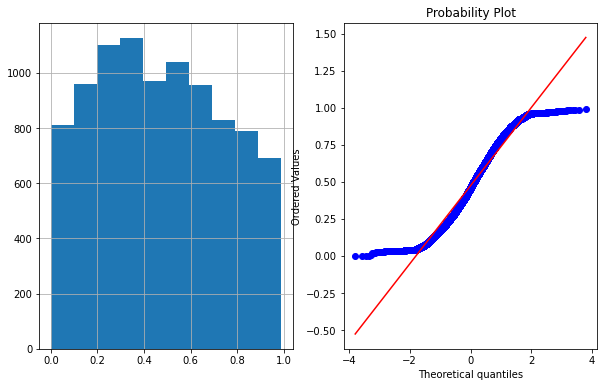

In [427]:
plot_data(data,'valence')

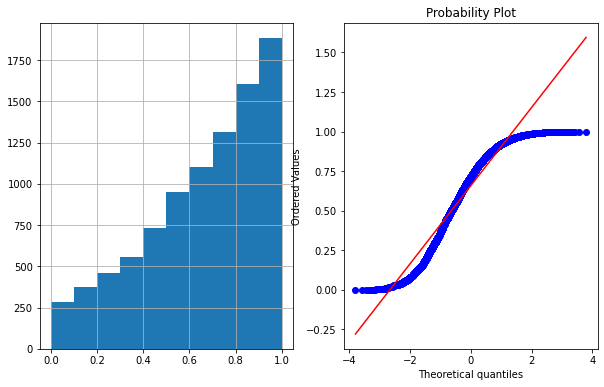

In [428]:
plot_data(data,'energy')

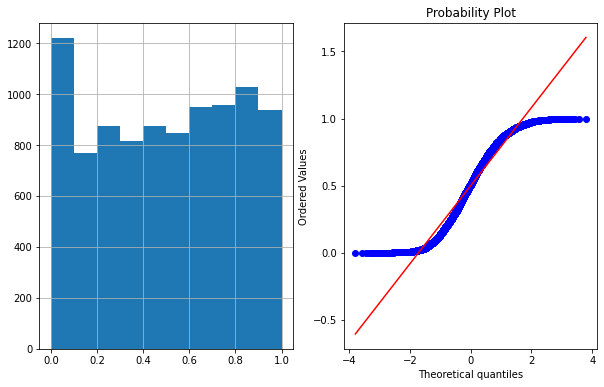

In [429]:
data['sqenergy']=pow(data['energy'],2)
plot_data(data,'sqenergy')

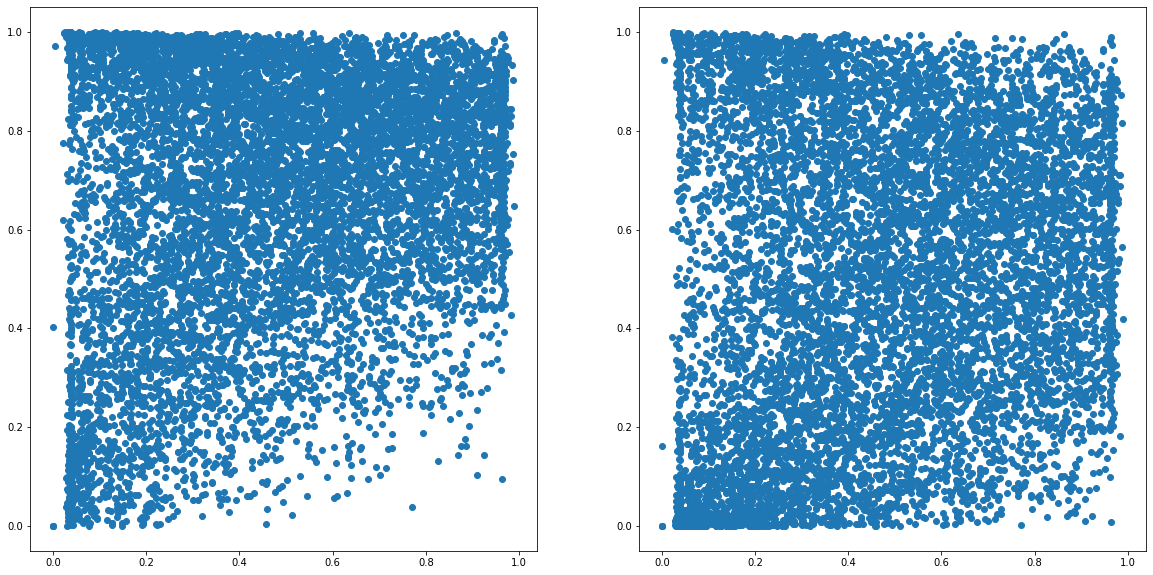

In [430]:
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.scatter(data['valence'],data['energy'])
plt.subplot(1,2,2)
plt.scatter(data['valence'],data['sqenergy'])
plt.show()

In [431]:
data.to_csv("cleanedDataset_Spotify.csv", index = False)